In [1]:
import matplotlib.pyplot as plt
import numpy as np

import DissimilarityMetrics
import ChannelChartingCore
import Evaluation

2024-10-13 16:38:19.783791: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-10-13 16:38:20.568036: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [2]:
# This may take some time
import dichasus_cf0x

2024-10-13 16:38:22.057401: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:995] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-10-13 16:38:22.096181: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:995] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-10-13 16:38:22.096567: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:995] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysf

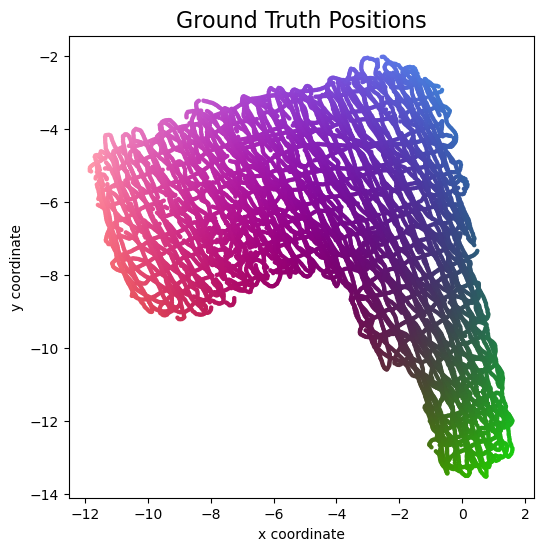

In [3]:
Evaluation.plot_colorized(dichasus_cf0x.groundtruth_positions, dichasus_cf0x.groundtruth_positions, title="Ground Truth Positions")

In [4]:
def mean_variance_from_delta_adp(delta_adp):
    mean = np.where(delta_adp == 0, 0, np.where(delta_adp > 18, np.inf, delta_adp * 0.0028 + 0.0024))
    variance = np.where(delta_adp == 0, 0, np.where(delta_adp > 18, np.inf, 0.015 * mean))

    return mean, variance

adp_metric = DissimilarityMetrics.ADPDissimilarityMetric(dichasus_cf0x.csi_time_domain, mean_variance_from_delta_adp)

In [5]:
velocity_mean = 0.235
velocity_variance = 0.015

# Make worste-case assumption of perfectly correlated velocities. This maximizes the variance.
velocity_metric = DissimilarityMetrics.VelocityDissimilarityMetric(velocity_mean, velocity_variance, True, dichasus_cf0x.timestamps)

In [6]:
GDM = ChannelChartingCore.GaussianDissimilarityModel([adp_metric, velocity_metric])
GDM.generate_short_paths(realization_count = 8)

  0%|          | 0/8 [00:00<?, ?it/s]

Generating dissimilarity realizations...


  0%|          | 0/2 [00:00<?, ?it/s]

Choosing smallest dissimilarity realization pair-wise...
Running shortest path algorithm...


Computing Shortest Paths:   0%|          | 0/104255000 [00:00<?, ?it/s]

Preparing Dijkstra Inputs:   0%|          | 0/5000 [00:00<?, ?it/s]

Starting Processes:   0%|          | 0/10 [00:00<?, ?it/s]

Generating dissimilarity realizations...


  0%|          | 0/2 [00:00<?, ?it/s]

Choosing smallest dissimilarity realization pair-wise...
Running shortest path algorithm...


Computing Shortest Paths:   0%|          | 0/104255000 [00:00<?, ?it/s]

Preparing Dijkstra Inputs:   0%|          | 0/5000 [00:00<?, ?it/s]

Starting Processes:   0%|          | 0/10 [00:00<?, ?it/s]

Generating dissimilarity realizations...


  0%|          | 0/2 [00:00<?, ?it/s]

Choosing smallest dissimilarity realization pair-wise...
Running shortest path algorithm...


Computing Shortest Paths:   0%|          | 0/104255000 [00:00<?, ?it/s]

Preparing Dijkstra Inputs:   0%|          | 0/5000 [00:00<?, ?it/s]

Starting Processes:   0%|          | 0/10 [00:00<?, ?it/s]

Generating dissimilarity realizations...


  0%|          | 0/2 [00:00<?, ?it/s]

Choosing smallest dissimilarity realization pair-wise...
Running shortest path algorithm...


Computing Shortest Paths:   0%|          | 0/104255000 [00:00<?, ?it/s]

Preparing Dijkstra Inputs:   0%|          | 0/5000 [00:00<?, ?it/s]

Starting Processes:   0%|          | 0/10 [00:00<?, ?it/s]

Generating dissimilarity realizations...


  0%|          | 0/2 [00:00<?, ?it/s]

Choosing smallest dissimilarity realization pair-wise...
Running shortest path algorithm...


Computing Shortest Paths:   0%|          | 0/104255000 [00:00<?, ?it/s]

Preparing Dijkstra Inputs:   0%|          | 0/5000 [00:00<?, ?it/s]

Starting Processes:   0%|          | 0/10 [00:00<?, ?it/s]

Generating dissimilarity realizations...


  0%|          | 0/2 [00:00<?, ?it/s]

Choosing smallest dissimilarity realization pair-wise...
Running shortest path algorithm...


Computing Shortest Paths:   0%|          | 0/104255000 [00:00<?, ?it/s]

Preparing Dijkstra Inputs:   0%|          | 0/5000 [00:00<?, ?it/s]

Starting Processes:   0%|          | 0/10 [00:00<?, ?it/s]

Generating dissimilarity realizations...


  0%|          | 0/2 [00:00<?, ?it/s]

Choosing smallest dissimilarity realization pair-wise...
Running shortest path algorithm...


Computing Shortest Paths:   0%|          | 0/104255000 [00:00<?, ?it/s]

Preparing Dijkstra Inputs:   0%|          | 0/5000 [00:00<?, ?it/s]

Starting Processes:   0%|          | 0/10 [00:00<?, ?it/s]

Generating dissimilarity realizations...


  0%|          | 0/2 [00:00<?, ?it/s]

Choosing smallest dissimilarity realization pair-wise...
Running shortest path algorithm...


Computing Shortest Paths:   0%|          | 0/104255000 [00:00<?, ?it/s]

Preparing Dijkstra Inputs:   0%|          | 0/5000 [00:00<?, ?it/s]

Starting Processes:   0%|          | 0/10 [00:00<?, ?it/s]

Contracting paths for metric VelocityDissimilarityMetric
95846128 path sections remain to be contracted
43882323 path sections remain to be contracted
13866989 path sections remain to be contracted
1147040 path sections remain to be contracted
4910 path sections remain to be contracted
0 path sections remain to be contracted
Determining longest short path...


Computing longest paths:   0%|          | 0/40000 [00:00<?, ?it/s]

Preparing tasks:   0%|          | 0/40000 [00:00<?, ?it/s]

Starting processes:   0%|          | 0/32 [00:00<?, ?it/s]

Longest short path has 324 hops


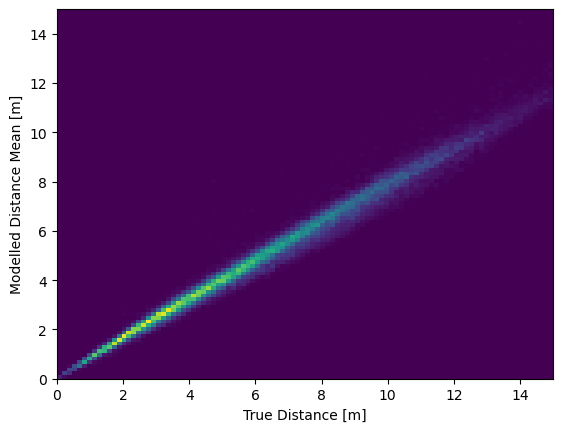

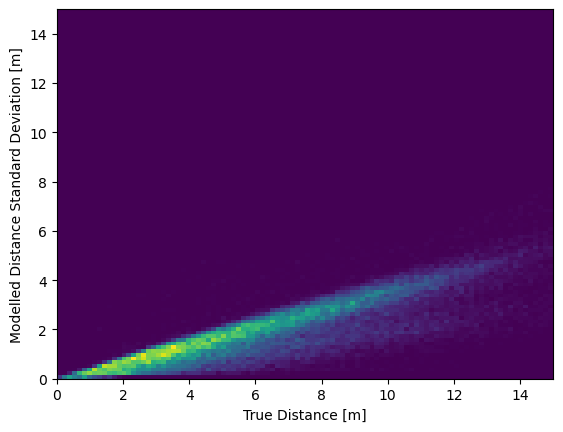

In [7]:
paths, path_hops, paths_d_mean, paths_d_variance = GDM.get_random_short_paths(50000, None)
groundtruth_distance_matrix = np.sqrt(np.sum((dichasus_cf0x.groundtruth_positions[:,np.newaxis,:] - dichasus_cf0x.groundtruth_positions[np.newaxis,:,:])**2, axis = -1))
groundtruth_dist = np.sum(groundtruth_distance_matrix[paths[:,:-1], paths[:,1:]], axis = 1).flatten()

plt.xlabel("True Distance [m]")
plt.ylabel("Modelled Distance Mean [m]")
plt.hist2d(groundtruth_dist, paths_d_mean, bins = 100, range = [(0, 15), (0, 15)])
plt.show()

plt.xlabel("True Distance [m]")
plt.ylabel("Modelled Distance Standard Deviation [m]")
plt.hist2d(groundtruth_dist, np.sqrt(paths_d_variance), bins = 100, range = [(0, 15), (0, 15)])
plt.show()

In [31]:
MIN_BATCH_SIZE = 2500
MAX_BATCH_SIZE = 3000
LEARNING_RATE_INITIAL = 1.5e-2
LEARNING_RATE_FINAL = 5e-3
MIN_PATHHOPS = 1
MAX_PATHHOPS = 15
TRAINING_BATCHES = 2000
ACCELERATION_MEAN = 0.03
ACCELERATION_VARIANCE = 1
ACCELERATION_WEIGHT = 1e-3

In [34]:
import importlib
importlib.reload(Evaluation)

<module 'Evaluation' from '/home/jovyan/Geodesic-Uncertainty-Loss-ChannelCharting/Evaluation.py'>

* **Note**: The neural network may not find the global optimum every time, resulting in higher than usual loss.
* Better initialization / pre-training (on e.g. generated free-space data) / higher initial learning rates would likely fix this issue, but are outside the scope of this work.

 199/2000 [=>............................] - ETA: 3:35 - loss: 2.5286 - metric: 0.0000e+00

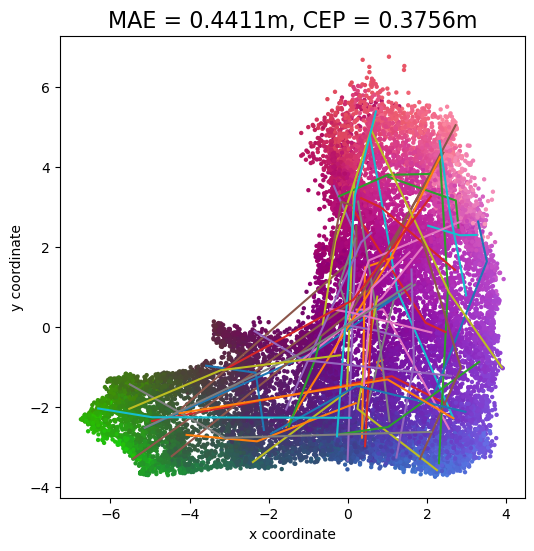

 399/2000 [====>.........................] - ETA: 3:13 - loss: 1.6378 - metric: 0.0000e+00

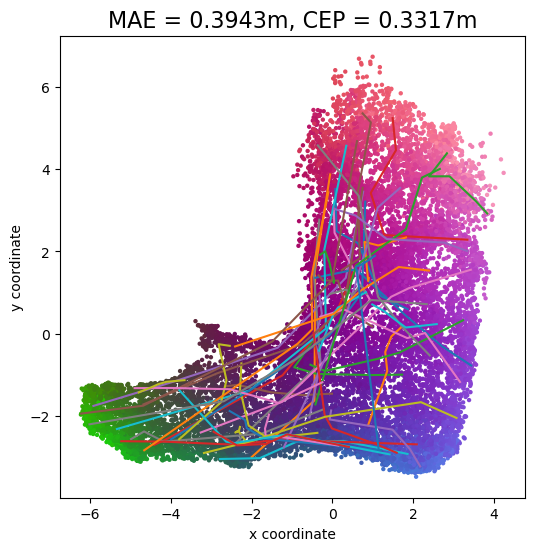

 599/2000 [=======>......................] - ETA: 2:50 - loss: 1.2680 - metric: 0.0000e+00

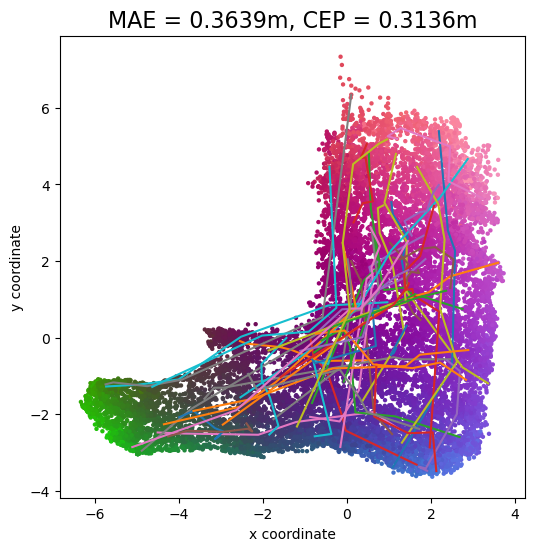

 799/2000 [==========>...................] - ETA: 2:27 - loss: 1.0385 - metric: 0.0000e+00

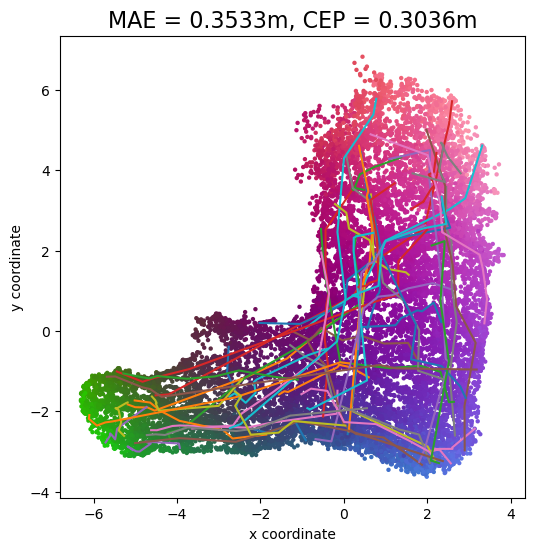

 999/2000 [=============>................] - ETA: 2:04 - loss: 0.8852 - metric: 0.0000e+00

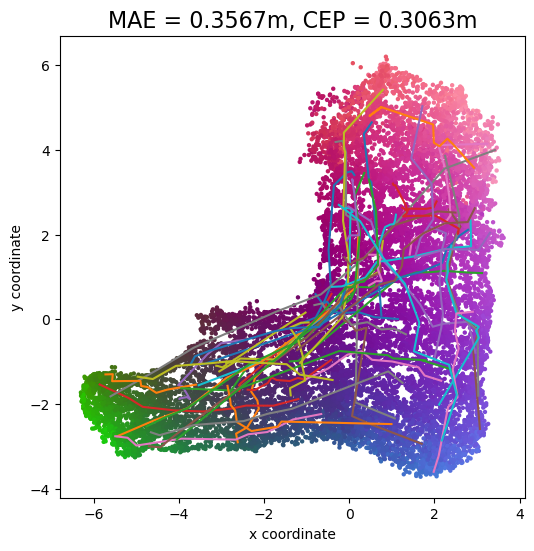

1199/2000 [================>.............] - ETA: 1:40 - loss: 0.7729 - metric: 0.0000e+00

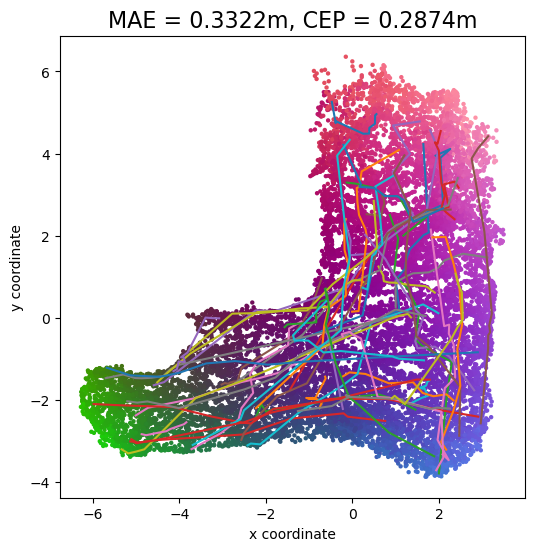

1399/2000 [===================>..........] - ETA: 1:16 - loss: 0.6870 - metric: 0.0000e+00

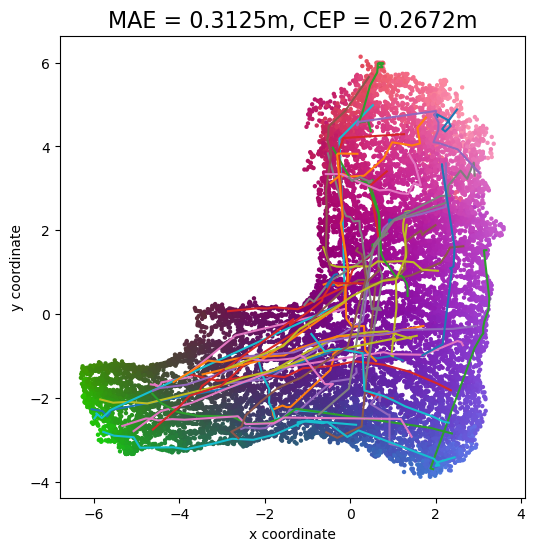

1599/2000 [======================>.......] - ETA: 51s - loss: 0.6184 - metric: 0.0000e+00

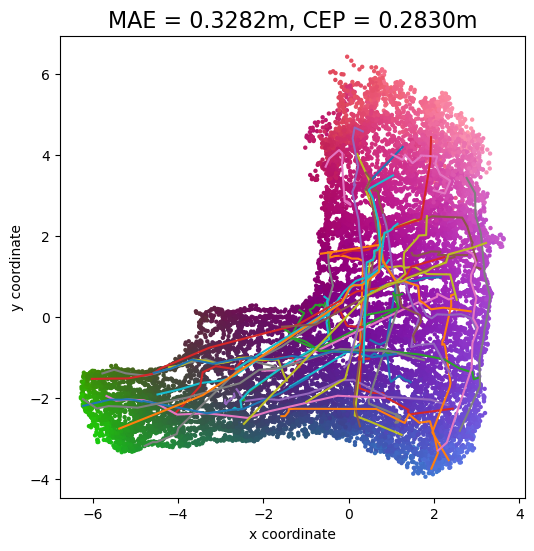

1799/2000 [=========================>....] - ETA: 25s - loss: 0.5614 - metric: 0.0000e+00

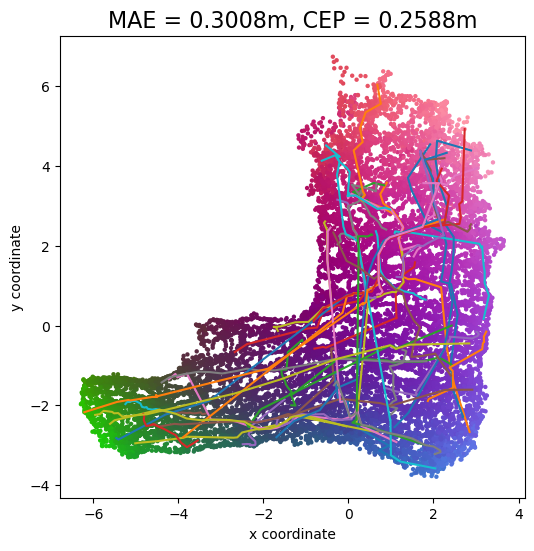

1999/2000 [============================>.] - ETA: 0s - loss: 0.5139 - metric: 0.0000e+00

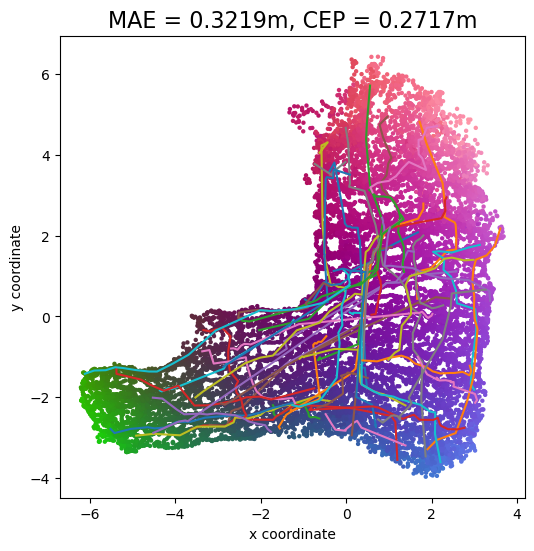

2000/2000 [==============================] - 264s 130ms/step - loss: 0.5137 - metric: 0.0000e+00


In [35]:
plot_callback = Evaluation.PlotChartCallback(dichasus_cf0x.groundtruth_positions, dichasus_cf0x.csi_time_domain.shape[0], MAX_PATHHOPS)
cc = ChannelChartingCore.ChannelChart(GDM, dichasus_cf0x.csi_time_domain, dichasus_cf0x.timestamps, min_batch_size = MIN_BATCH_SIZE, max_batch_size = MAX_BATCH_SIZE, learning_rate_initial = LEARNING_RATE_INITIAL, learning_rate_final = LEARNING_RATE_FINAL, min_pathhops = MIN_PATHHOPS, max_pathhops = MAX_PATHHOPS, randomize_pathhops = False, training_batches = TRAINING_BATCHES, plot_callback = plot_callback, acceleration_mean = ACCELERATION_MEAN, acceleration_variance = ACCELERATION_VARIANCE, acceleration_weight = ACCELERATION_WEIGHT)

In [36]:
channel_chart_positions = cc.predict(dichasus_cf0x.csi_time_domain)

652/652 [==============================] - 1s 2ms/step


In [37]:
ct, tw, ks = Evaluation.ct_tw_ks_on_subset(dichasus_cf0x.groundtruth_positions, channel_chart_positions)
print(f"CT: {ct:.4f}\nTW: {tw:.4f}\nKS: {ks:.4f}")

CT: 0.9975
TW: 0.9977
KS: 0.0718


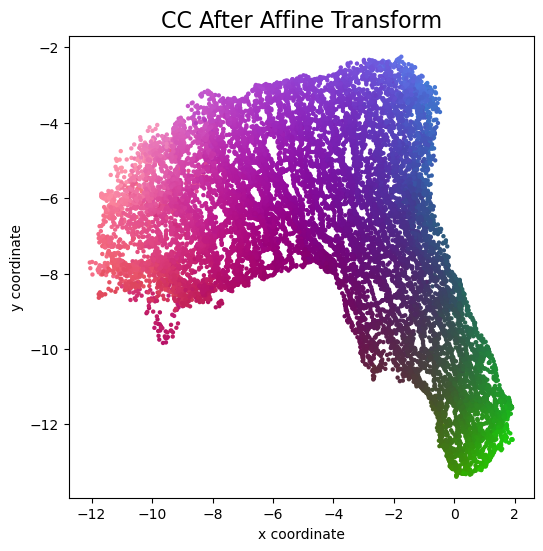

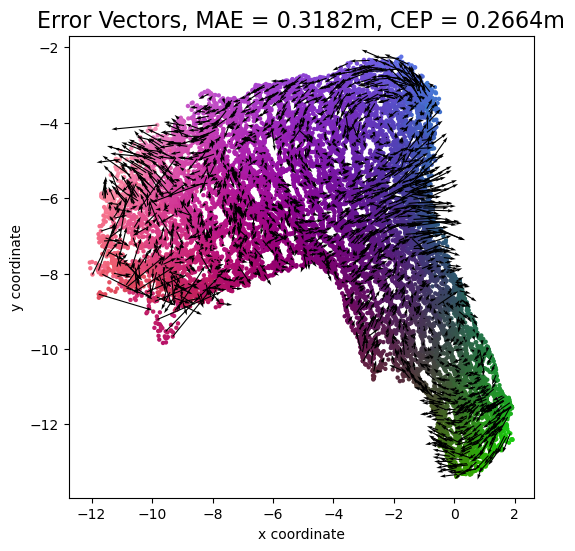

In [38]:
channel_chart_positions_transformed, errorvectors, errors, mae, cep = Evaluation.mean_absolute_error_transformed(dichasus_cf0x.groundtruth_positions, channel_chart_positions)
Evaluation.plot_colorized(channel_chart_positions_transformed, dichasus_cf0x.groundtruth_positions, title = "CC After Affine Transform")

nth_errorvector = 10
Evaluation.plot_colorized(channel_chart_positions_transformed, dichasus_cf0x.groundtruth_positions, title = f"Error Vectors, MAE = {mae:.4f}m, CEP = {cep:.4f}m", show = False)
plt.quiver(channel_chart_positions_transformed[::nth_errorvector, 0], channel_chart_positions_transformed[::nth_errorvector, 1], errorvectors[::nth_errorvector, 0], errorvectors[::nth_errorvector, 1], color = "black", angles = "xy", scale_units = "xy", scale = 1)
plt.show()

### Evaluate on Test set

In [ ]:
test_set_groundtruth_positions = []
test_set_csi_time_domain = []

for csi, pos, time in dichasus_cf0x.dichasus_cf0x_testset.batch(1000):
    test_set_csi_time_domain.append(csi.numpy())
    test_set_groundtruth_positions.append(pos.numpy())

test_set_csi_time_domain = np.concatenate(test_set_csi_time_domain)
test_set_groundtruth_positions = np.concatenate(test_set_groundtruth_positions)

In [ ]:
test_set_channel_chart_positions = cc.predict(test_set_csi_time_domain)

In [ ]:
ts_ct, ts_tw, ts_ks = Evaluation.ct_tw_ks_on_subset(test_set_groundtruth_positions, test_set_channel_chart_positions)
print(f"CT: {ts_ct:.4f}\nTW: {ts_tw:.4f}\nKS: {ts_ks:.4f}")

In [ ]:
test_set_channel_chart_positions_transformed, ts_errorvectors, ts_errors, ts_mae, ts_cep = Evaluation.mean_absolute_error_transformed(test_set_groundtruth_positions, test_set_channel_chart_positions)
Evaluation.plot_colorized(test_set_channel_chart_positions_transformed, test_set_groundtruth_positions, title = "Test Set: CC After Affine Transform")

nth_errorvector = 10
Evaluation.plot_colorized(test_set_channel_chart_positions_transformed, test_set_groundtruth_positions, title = f"Test Set: Error Vectors, MAE = {ts_mae:.4f}m, CEP = {ts_cep:.4f}m", show = False)
plt.quiver(test_set_channel_chart_positions_transformed[::nth_errorvector, 0], test_set_channel_chart_positions_transformed[::nth_errorvector, 1], ts_errorvectors[::nth_errorvector, 0], ts_errorvectors[::nth_errorvector, 1], color = "black", angles = "xy", scale_units = "xy", scale = 1)
plt.show()